In [2]:
%matplotlib inline
import pandas as pd
import matplotlib as plt
import math

In [4]:
df = pd.read_csv("notas_2014_2017.csv")

In [5]:
alunos_mob = df[df.CODALUNO.isin(df[df["DISCIPLINA"] == "MOBILIDADE ACADÊMICA INTERNACIONAL"].CODALUNO.unique())]

In [21]:
alunos = alunos_mob[alunos_mob["DISCIPLINA"] == "MOBILIDADE ACADÊMICA INTERNACIONAL"].CODALUNO.unique()

In [7]:
alunos_periodo = []
for a in alunos:
    periodo_mob = alunos_mob[(alunos_mob["CODALUNO"] == a) & (alunos_mob["DISCIPLINA"] == "MOBILIDADE ACADÊMICA INTERNACIONAL")].PERIODO
    alunos_periodo.append((a, periodo_mob.iloc[0]))
print len(alunos_periodo)

518


In [22]:
notas = []
for l in alunos_periodo:
    aluno = l[0]
    periodo = l[1]
    notas_antes = alunos_mob[(alunos_mob["CODALUNO"] == aluno)&(alunos_mob["PERIODO"] < periodo)].NOTA
    notas_depois = alunos_mob[(alunos_mob["CODALUNO"] == aluno)&(alunos_mob["PERIODO"] > periodo)].NOTA
    notas.append((notas_antes.mean(), aluno, notas_depois.mean()))

In [9]:
notas_filtradas = []
for l in notas:
    if not (math.isnan(l[0]) or math.isnan(l[2])):
        notas_filtradas.append(l)
print len(notas_filtradas)

231


In [10]:
n = zip(*notas_filtradas)
notas_df = pd.DataFrame(
            {
                "CODALUNO": n[1],
                "NOTAS_ANTES": n[0],
                "NOTAS_DEPOIS": n[2]}
            )

In [11]:
notas_df["DIFF_NOTAS"] = notas_df.NOTAS_DEPOIS - notas_df.NOTAS_ANTES

In [12]:
notas_df.head()

,CODALUNO,NOTAS_ANTES,NOTAS_DEPOIS,DIFF_NOTAS
0,3542C6DCF5029786A1B6B45FCB91283A,10.000000,10.000,0.000000
1,3542C6DCF502978691DD5E7C6C5619D6,8.900000,10.000,1.100000
2,3542C6DCF5029786C13E1261621134ED,0.000000,10.000,10.000000
3,3542C6DCF5029786139679CEFCF0C92B,9.650000,10.000,0.350000
4,3542C6DCF5029786891B5354DB9EB2C8,8.185714,9.675,1.489286


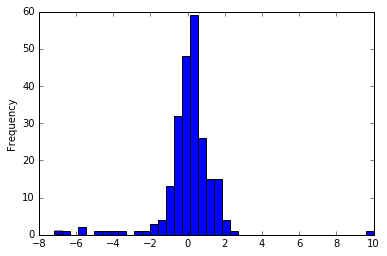

In [13]:
(notas_df.DIFF_NOTAS).plot(kind='hist',bins=40)

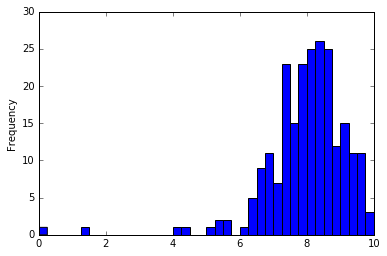

In [14]:
(notas_df.NOTAS_ANTES).plot(kind='hist',bins=40)

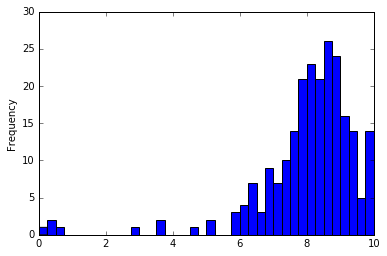

In [15]:
(notas_df.NOTAS_DEPOIS).plot(kind='hist',bins=40)

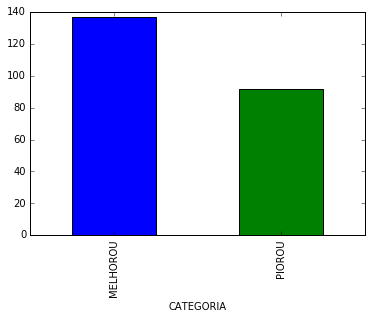

In [16]:
cats = ["MELHOROU", "PIOROU"]
quants = [notas_df[notas_df.DIFF_NOTAS > 0].shape[0],notas_df[notas_df.DIFF_NOTAS < 0].shape[0]]

diff_df = pd.DataFrame(
            {
                "CATEGORIA": cats,
                "QUANTIDADE": quants }
        )
diff_df.set_index('CATEGORIA').QUANTIDADE.plot(kind="bar")

[7.9789338141025388, 8.0287251010151834]


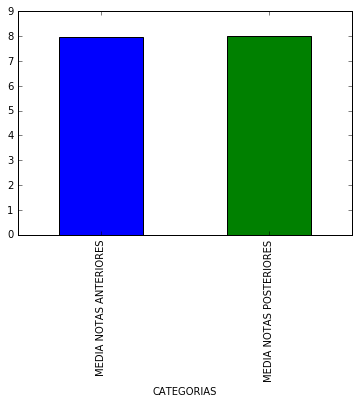

In [23]:
cats2 = ["MEDIA NOTAS ANTERIORES", "MEDIA NOTAS POSTERIORES"]
notas2 = [notas_df["NOTAS_ANTES"].mean(), notas_df["NOTAS_DEPOIS"].mean()]
print notas2

media_df = pd.DataFrame(
            {
                "CATEGORIAS": cats2,
                "MEDIAS": notas2
            }
        )

media_df.set_index('CATEGORIAS').MEDIAS.plot(kind="bar")

ttest_ind()
We can use this test, if we observe two independent samples from the same or different population, e.g. exam scores of boys and girls or of two ethnic groups. The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [18]:
from scipy.stats import ttest_ind
ttest_ind(notas_df['NOTAS_ANTES'], notas_df['NOTAS_DEPOIS'])

Ttest_indResult(statistic=-0.38650988103187039, pvalue=0.69929780770848915)